# <center>Lab 5. Дерева прийняття рішень. Вступ</center>

#### Приклад

Задачі класифікації і регресії - це задача навчання з учителем. Як приклад будемо представляти завдання кредитного скорінгу: на основі накопичених банком даних про своїх клієнтів було б добре прогнозувати неповернення кредиту. Тут для алгоритму досвід *E*  - це наявна навчальна вибірка: набір *обєктів* (людей), кожен з яких характеризується набором *ознак*  (таких як вік, зарплата, тип кредиту, неповернення в минулому і т.д.), а також *цільовою ознакою*. Якщо цю цільову ознаку - просто факт неповернення кредиту (1 або 0, тобто банк знає про своїх клієнтів, хто повернув кредит, а хто - ні), то це завдання (бінарної) класифікації. Якщо відомо, *на скільки* за часом клієнт затягнув з поверненням кредиту і хочеться те ж саме прогнозувати для нових клієнтів, то це буде завданням регресії.

Нарешті, третя абстракція у визначенні машинного навчання - це метрика оцінки продуктивності алгоритму *P*. Такі метрики розрізняються для різних завдань і алгоритмів, і про них ми будимо говорити в міру вивчення алгоритмів. Поки скажімо, що найпростіша метрика якості алгоритму, вирішального завдання класифікації - це частка правильних відповідей (*accuracy*, не називайте її *точностью*, цей переклад зарезервований під іншу метрику, * precision *) - то є просто частка вірних прогнозів алгоритму на тестової вибірці

Нарешті, третя абстракція у визначенні машинного навчання - це метрика оцінки продуктивності алгоритму * P *. Такі метрики розрізняються для різних завдань і алгоритмів, і про них ми будимо говорити в міру вивчення алгоритмів. Поки скажімо, що найпростіша метрика якості алгоритму, вирішального завдання класифікації - це частка правильних відповідей (*accuracy*, не називайте її * точністю *, цей переклад зарезервований під іншу метрику, *precision*) - то є просто частка вірних прогнозів алгоритму на тестової вибірці.

Далі будемо говорити про дві задачі навчання з учителем: про класифікацію і регресcію.

## Дерево рішень
Почнемо огляд методів класифікації і регресії з одного з найпопулярніших - з дерева рішень. Дерева рішень використовуються в повсякденному житті в самих різних областях людської діяльності, часом і дуже далеких від машинного навчання. Деревом рішень можна назвати наочну інструкцію, що робити в якій ситуації. 

Часто дерево рішень є узагальненним досвідом експертів, засобом передачі знань майбутнім співробітникам або моделлю бізнес-процесу компанії. Наприклад, до впровадження масштабованих алгоритмів машинного навчання в банківській сфері завдання кредитного скорингу вирішувалася експертами. Рішення про видачу кредиту позичальникові приймалося на основі деяких інтуїтивно (або з досвіду) виведених правил, які можна представити у вигляді дерева рішень.
<img src="https://habrastorage.org/files/194/9b6/ae9/1949b6ae97ab4fc9b1a37fbf182eda8f.gif"/><br>
В цьому випадку можна сказати, що вирішується завдання бінарної класифікації (цільової клас має два значення: "Видати кредит" і "Відмовити") за ознаками "Вік", "Наявність будинку", "Дохід" і "Освіта".

Дерево рішень як алгоритм машинного навчання - по суті те ж саме: об'єднання логічних правил виду "Значення ознаки $a$ менше $x$ і Значення ознаки $b$ менше $y$ ... => Клас 1" в структуру даних "Дерево ". Величезна перевага дерев рішень в тому, що вони легко інтерпретуються, зрозумілі людині. Наприклад, за схемою на малюнку вище можна пояснити позичальнику, чому йому було відмовлено в кредиті. Скажімо, тому, що у нього немає будинку і дохід менше 5000. Як ми побачимо далі, багато інших, хоч і більш точні, моделі не володіють цією властивістю і можуть розглядатися скоріше як "чорний ящик", в який завантажили дані і отримали відповідь. У зв'язку з цією "зрозумілістю" дерев рішень і їх схожістю з моделлю прийняття рішень людиною (можна легко пояснювати шефу свою модель), дерева рішень отримали величезну популярність, а один з представників цієї групи методів класифікації, С4.5, розглядається першим в списку 10 кращих алгоритмів інтелектуального аналізу даних
("Top 10 algorithms in data mining", Knowledge and Information Systems, 2008. [PDF](http://www.cs.uvm.edu/~icdm/algorithms/10Algorithms-08.pdf)).

## Як будується дерево рішення

У прикладі з кредитного скорингу ми бачили, що рішення про видачу кредиту приймалося на основі віку, наявності нерухомості, доходу та інших. Але яка буде ознака вибрана першою? Для цього розглянемо приклад простіше, де всі ознаки бінарні.

Тут можна згадати гру "20 запитань", яка часто згадується у вступі в дерева рішень. Напевно кожен в неї грав. Одна людина загадує знаменитість, а другий намагається відгадати, задаючи лише питання, на які можна відповісти "Так" або "Ні" (опустимо варіанти "не знаю" і "не можу сказати"). Яке питання відгадує задасть насамперед? Звичайно, такий, який найсильніше зменшить кількість варіантів, що залишилися. Наприклад, питання "Це Анджеліна Джолі?" в разі негативної відповіді залишить понад 6 мільярдів варіантів для подальшого перебору (звичайно, трохи менше, не кожна людина - знаменитість, але все одно чимало), а ось питання "Це жінка?" відсіче вже близько половини знаменитостей. Тобто, ознака "статті" набагато краще розділяє вибірку людей, ніж ознака "це Анджеліна Джолі", "національність-іспанець" або "любить футбол". Це інтуїтивно відповідає поняттю приросту інформації, заснованого на ентропії

#### Ентропія
Ентропія Шеннона визначається для системи з $N$ можливими станами наступним чином:

$$\Large S = -\sum_{i=1}^{N}p_ilog_2p_i,$$

де $p_i$ - ймовірності знаходження системи в $i$ -му стані. Це дуже важливе поняття, яке використовується в фізиці, теорії інформації та інших областях. Опускаючи передумови запровадження (комбінаторні і теоретико-інформаційні) цього поняття, зазначимо, що, інтуїтивно, ентропія відповідає ступеню хаосу в системі. Чим вище ентропія, тим менше впорядкована система і навпаки. Це допоможе там формалізувати "ефективний розподіл вибірки", про яке ми говорили в контексті гри "20 запитань".

<h4>Приклад</h4>
Для ілюстрації того, як ентропія допоможе визначити хороші ознаки для побудови дерева, наведемо той же іграшковий приклад, що в статті <a href="https://habrahabr.ru/post/171759/"> "Ентропія та дерева прийняття рішень" </a>. Будемо передбачати колір кульки по його координаті. Звичайно, нічого спільного з життям це не має, але дозволяє показати, як ентропія використовується для побудови дерева рішень.

Тут 9 синіх кульок і 11 жовтих. Якщо ми навмання витягли кульку, то вона з ймовірністю $p_1=\frac{9}{20}$ буде синьою і з ймовірністю $p_2=\frac{11}{20}$ - жовтою. Значить, ентропія стану$S_0 = -\frac{9}{20}log_2{\frac{9}{20}}-\frac{11}{20}log_2{\frac{11}{20}} \approx 1$. Саме це значення поки ні про що нам не говорить. Тепер подивимося, як зміниться ентропія, якщо розбити кульки на дві групи - з координатою менше або дорівнює 12 і більше 12.
<img src="https://habrastorage.org/files/186/444/a8b/186444a8bd0e451c8324ca8529f8d4f4.png"/><br>

У лівій групі виявилося 13 куль, з яких 8 синіх і 5 жовтих. Ентропія цієї групи дорівнює $S_1 = -\frac{5}{13}log_2{\frac{5}{13}}-\frac{8}{13}log_2{\frac{8}{13}} \approx 0.96$. У правій групі виявилося 7 куль, з яких 1 синя і 6 жовтих. Ентропія правої групи дорівнює $S_2 = -\frac{1}{7}log_2{\frac{1}{7}}-\frac{6}{7}log_2{\frac{6}{7}} \approx 0.6$. Як бачимо, ентропія зменшилася в обох групах у порівнянні з початковим станом, хоч в лівій і не сильно. Оскільки ентропія - по суті ступінь хаосу (або невизначеності) в системі, зменшення ентропії називають приростом інформації. Формально приріст інформації (information gain, IG) при розбитті вибірки за ознакою $Q$ (в нашому прикладі це ознака "$x \leq 12$") визначається як
$$\Large IG(Q) = S_O - \sum_{i=1}^{q}\frac{|N_i|}{N}S_i,$$
де $q$ - число груп після розбиття, $N_i$ - число елементів вибірки, у яких ознака $Q$ має $i$ -е значення. У нашому випадку після поділу вийшло дві групи ($q = 2$) - одна з 13 елементів ($N_1 = 13$), друга - з 7 ($N_2 = 7$). Приріст інформації вийшов

$$\Large IG("x \leq 12") = S_0 - \frac{13}{20}S_1 - \frac{7}{20}S_2 \approx 0.16.$$

Виходить, розділивши кульки на дві групи за ознакою "координата менше або дорівнює 12", ми вже отримали більше впорядковану систему, ніж на початку. Продовжимо розподіл кульок на групи до тих пір, поки в кожній групі кулька не будуть одного кольору.
<Img src = "https://habrastorage.org/files/dae/a88/2b0/daea882b0a8e4ef4b23325c88f0353a1.png" /> <br>
Для правої групи було потрібно всього одне додаткове розбиття за ознакою "координата менше або дорівнює 18", для лівої - ще три. Очевидно, ентропія групи з кульками одного кольору дорівнює 0 ($log_2{1} = 0$), що відповідає уявленню, що група кульок одного кольору - впорядкована.
У підсумку ми побудували дерево рішень, яке визначає колір кульки по його координаті. Відзначимо, що таке дерево рішень може погано працювати для нових об'єктів (визначення кольору нових кульок), оскільки воно ідеально підлаштувати під навчальну вибірку (початкові 20 кульок). Для класифікації нових кульок краще підійде дерево з меншим числом "питань", або поділів, нехай навіть воно і не ідеально розбиває по квітам навчальну вибірку. Цю проблему, перенавчання, ми ще розглянемо далі.

#### Алгоритм побудов дерева

Можна переконатися в тому, що побудоване в попередньому прикладі дерево є в деякому сенсі оптимальним - треба було тільки 5 "питань" (умов на ознака $x$), щоб "підігнати" дерево рішень під навчальну вибірку, тобто щоб дерево правильно класифікувало  навчальний об'єкт. За інших умов поділу вибірки дерево вийде глибше.

В основі популярних алгоритмів побудови дерева рішень, таких як ID3 і C4.5, лежить принцип жадібної максимізації приросту інформації - на кожному кроці вибирається та ознака, при поділі за якою приріст інформації виявляється найбільшим. Далі процедура повторюється рекурсивно, поки ентропія не опиниться рівною нулю або якийсь малій величині (якщо дерево не підганяється ідеально під навчальну вибірку щоб уникнути перенавчання).
У різних алгоритмах застосовуються різні евристики для "ранньої зупинки" або "відсікання", щоб уникнути побудови перенавчання дерева.

```python
def build(L):
    create node t
    if the stopping criterion is True:
        assign a predictive model to t
    else:
        Find the best binary split L = L_left + L_right
        t.left = build(L_left)
        t.right = build(L_right)
    return t     
```

#### Інші критерії якості розбиття в задачі класифікації

Ми розібралися, в тому, як поняття ентропії дозволяє формалізувати уявлення про якість розбиття в дереві. Але це всього-лише евристика, існують і інші:

 - Невизначеність Джінні (Gini impurity):  $G = 1 - \sum\limits_k (p_k)^2$. Максимізацію цього критерію можна інтерпретувати як максимізацію числа пар обєектів одного класу, що є в одному піддереві.  
 - Помилка класифікації (misclassification error):  $E = 1 - \max\limits_k p_k$
 
 
На практиці помилка класифікації майже не використовується, а невизначеність Джині і приріст інформації працюють майже однаково.

У разі завдання бінарної класифікації ($p_+$ - ймовірність об'єкта мати мітку +) ентропія і невизначеність Джині приймуть такий вигляд:<br><br>
$$ S = -p_+ \log_2{p_+} -p_- \log_2{p_-} = -p_+ \log_2{p_+} -(1 - p_{+}) \log_2{(1 - p_{+})};$$
$$ G = 1 - p_+^2 - p_-^2 = 1 - p_+^2 - (1 - p_+)^2 = 2p_+(1-p_+).$$


Коли ми побудуємо графіки цих двох функцій від аргументу $p_+$, то побачимо, що графік ентропії дуже близький до графіка подвоєною невизначеності Джині, і тому на практиці ці два критерії "працюють" майже однаково.

In [3]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

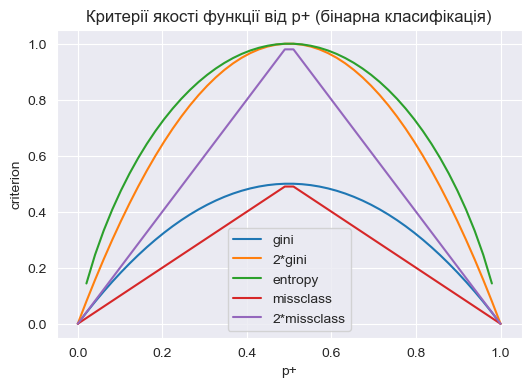

In [4]:
plt.rcParams['figure.figsize'] = (6,4)
xx = np.linspace(0,1,50)
plt.plot(xx, [2 * x * (1-x) for x in xx], label='gini')
plt.plot(xx, [4 * x * (1-x) for x in xx], label='2*gini')
plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1 - x)  for x in xx], label='entropy')
plt.plot(xx, [1 - max(x, 1-x) for x in xx], label='missclass')
plt.plot(xx, [2 - 2 * max(x, 1-x) for x in xx], label='2*missclass')
plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Критерії якості функції від p+ (бінарна класифікація)')
plt.legend();

#### Приклад
Розглянемо приклад застосування дерева рішень з бібліотеки Scikit-learn для синтетичних даних. Згенеруємо дані. Два класи будуть згенеровані з двох нормальних розподілів з різними середніми.

In [5]:
# перший клас
np.random.seed(7)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# другий клас
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

Напишемо допоміжну функцію, яка буде повертати поверати дані для подальшої візуалізації.

In [6]:
def get_grid(data, eps=0.01):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, eps),
                         np.arange(y_min, y_max, eps))

Відобразимо дані. Неформально, завдання класифікації в цьому випадку - побудувати якусь "хорошу" межу, що розділяє 2 класи (червоні точки від жовтих). Якщо перебільшувати, то машинне навчання в цьому випадку зводиться до того, як вибрати хорошу границю чи межу. Можливо, пряма буде занадто простою межею, а якась складна крива, що обгинає кожну червону крапку - буде занадто складною і будемо багато помилятися на нових прикладах з того ж розподілу, з якого прийшла навчальна вибірка. Інтуїція підказує, що добре на нових даних буде працювати якась *гладка* межа, що розділяє 2 класу, або хоча б просто пряма (в $n$-ому випадку - гіперплощина).

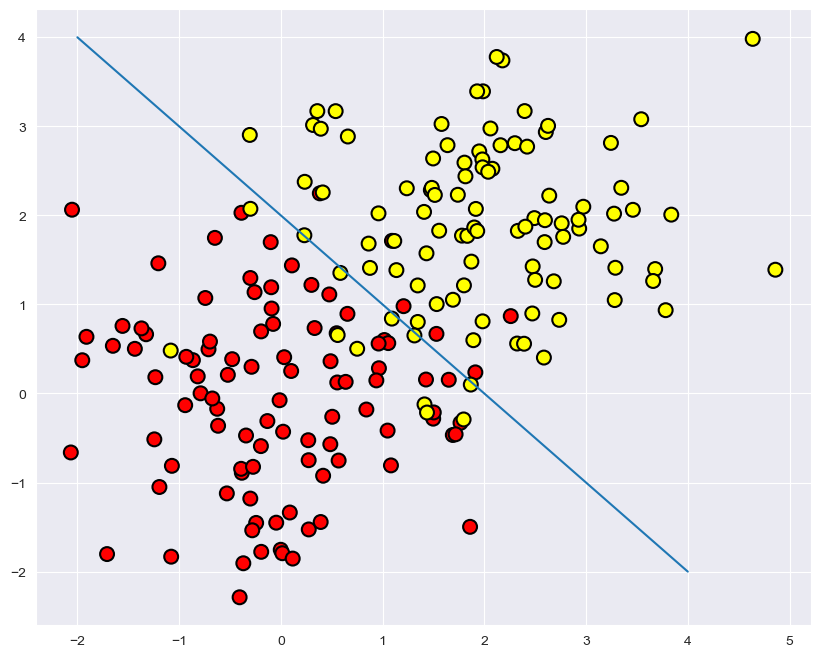

In [7]:
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5)
plt.plot(range(-2,5), range(4,-3,-1));

Спробуємо розділити ці два класи, навчивши дерево рішень. У дереві будемо використовувати параметр `max_depth`, що обмежує глибину дерева. Візуалізіємо отриману границю поділу класів.

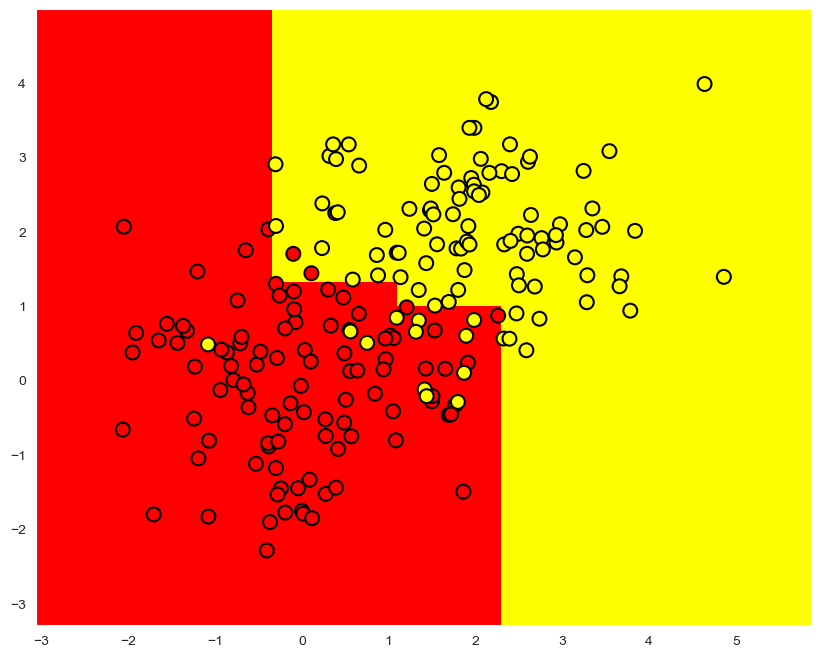

In [11]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

# навчаання дерева
clf_tree.fit(train_data, train_labels)

# для відобрадення
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);

А як виглядає саме побудоване дерево? Бачимо, що дерево "нарізає" простір на 7 прямокутників (в дереві 7 листя). У кожному такому прямокутнику прогноз дерева буде сталою, за переважання об'єктів того чи іншого класу.

In [15]:
# викоритсаємо .dot формат для визуалізації дерева
from sklearn.tree import export_graphviz
export_graphviz(clf_tree, feature_names=['x1', 'x2'], 
                out_file='small_tree.dot', filled=True)
!dot -Tpng small_tree.dot -o small_tree.png
!rm small_tree.dot

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

plt.figure(figsize=(20,10))
img=mpimg.imread('small_tree.png')
imgplot = plt.imshow(img)
plt.show()

'dot' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


FileNotFoundError: [Errno 2] No such file or directory: 'small_tree.png'

<Figure size 2000x1000 with 0 Axes>

Як "читається" таке дерево?

На початку було 200 об'єктів, 100 - одного класу і 100 - другого. Ентропія початкового стану була максимальною - 1. Потім було зроблено розбиття об'єктів на 2 групи в залежності від порівняння ознаки  $x_1$ зі значенням $1.1034$ $ (знайдіть цю ділянку границі на малюнку вище, до дерева). При цьому ентропія і в лівій, і в правій групі об'єктів зменшилася. І так далі, дерево будується до глибини 3. При такій візуалізації чим більше об'єктів одного класу, тим колір вершини ближче до темно-помаранчевого і, навпаки, чим більше об'єктів другого класу, тим ближче колір до темно-синього. На початку об'єктів одного класу порівну, тому коренева вершина дерева - білого кольору.

### Як дереаво працює із категоріальнми даними

Припустимо, у вибірці є кількісний ознака "Вік", який має багато унікальних значень. Дерево рішень буде шукати краще (за критерієм типу приросту інформації) розбиття вибірки, перевіряючи бінарні ознаки типу "Вік <17", "Вік <22.87" і т.д. Але що якщо таких "зрізів" віку занадто багато? А що якщо є ще кількісна ознака "Зарплата", і зарплату теж можна «нарізати» великим числом способів? Виходить дуже багато бінарних ознак для вибору кращого на кожному кроці побудови дерева. Для вирішення цієї проблеми застосовують евристики для обмеження числа порогів, з якими ми порівнюємо кількісні ознаки.

Розглянемо це на  прикладі. Нехай є наступна вибірка:

In [16]:
data = pd.DataFrame({'Вік': [17,64,18,20,38,49,55,25,29,31,33], 
             'Неповерення кредиту': [1,0,1,0,1,0,0,1,1,0,1]})

In [17]:
data

,Вік,Неповерення кредиту
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


Відсортуємо її по зростанню віку.

In [18]:
data.sort_values('Вік')

,Вік,Неповерення кредиту
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


Навчимо на цих даних дерево рішень (без обмеження глибини) і подивимося на нього.

In [19]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data['Вік'].values.reshape(-1, 1), data['Неповерення кредиту'].values)

DecisionTreeClassifier(random_state=17)

Бачимо, що дерево задіяло 5 значень, з якими порівнюється вік: 43.5, 19, 22.5, 30 і 32 роки. Якщо придивитися, то це якраз середні значення між віком, при яких цільовий клас "змінюється" з 1 на 0 або навпаки.  приклад: 43.5 - це середнє між 38 і 49 роками, клієнт, якому 38 років не повернув кредит, а той, якому 49 - повернув. Аналогічно, 19 років - середнє між 18 і 20 роками. Тобто в якості порогів для "нарізання" кількісної ознаки, дерево "дивиться" на ті значення, при яких цільової клас змінює своє значення.

Подумайте, чому не має сенсу в даному випадку розглядати ознака "Вік <17.5".

In [20]:
export_graphviz(age_tree, feature_names=['Возраст'], 
                out_file='age_tree.dot', filled=True)
!dot -Tpng age_tree.dot -o age_tree.png

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

plt.figure(figsize=(20,10))
img=mpimg.imread('age_tree.png')
imgplot = plt.imshow(img)
plt.show()

'dot' is not recognized as an internal or external command,
operable program or batch file.


FileNotFoundError: [Errno 2] No such file or directory: 'age_tree.png'

<Figure size 2000x1000 with 0 Axes>

Розглянемо приклад складніше: додамо ознака "Зарплата" (тис.грн/місяць).

In [23]:
data2 = pd.DataFrame({'Вік':  [17,64,18,20,38,49,55,25,29,31,33], 
                      'Зарплата': [25,80,22,36,37,59,74,70,33,102,88], 
             'Неповерення кредиту': [1,0,1,0,1,0,0,1,1,0,1]})

In [24]:
data2

,Вік,Зарплата,Неповерення кредиту
0,17,25,1
1,64,80,0
2,18,22,1
3,20,36,0
4,38,37,1
5,49,59,0
6,55,74,0
7,25,70,1
8,29,33,1
9,31,102,0


Якщо впорядкувати за віком, то цільовий клас ("Неповернення кредиту") змінюється (з 1 на 0 або навпаки) 5 разів. А якщо впорядкувати за зарплатою - то 7 разів. Як тепер дерево буде вибирати ознаки? Подивимося.

In [23]:
data2.sort_values('Вік')

,Вік,Зарплата,Неповерення кредиту
0,17,25,1
2,18,22,1
3,20,36,0
7,25,70,1
8,29,33,1
9,31,102,0
10,33,88,1
4,38,37,1
5,49,59,0
6,55,74,0


In [24]:
data2.sort_values('Зарплата')

,Вік,Зарплата,Неповерення кредиту
2,18,22,1
0,17,25,1
8,29,33,1
3,20,36,0
4,38,37,1
5,49,59,0
7,25,70,1
6,55,74,0
1,64,80,0
10,33,88,1


In [25]:
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data2[['Вік', 'Зарплата']].values, data2['Неповерення кредиту'].values);

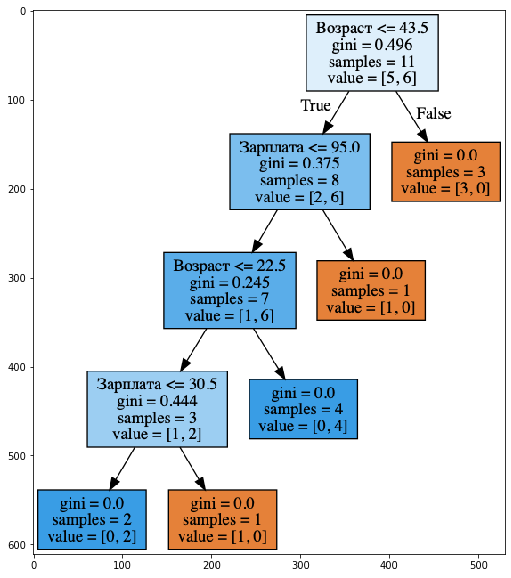

In [26]:
export_graphviz(age_sal_tree, feature_names=['Возраст', 'Зарплата'], 
                out_file='age_sal_tree.dot', filled=True)
!dot -Tpng age_sal_tree.dot -o age_sal_tree.png

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

plt.figure(figsize=(20,10))
img=mpimg.imread('age_sal_tree.png')
imgplot = plt.imshow(img)
plt.show()

Бачимо, що в дереві задіяні як розбиття за віком, так і по зарплаті. Причому пороги, з якими порівнюються ознаки: 43.5 і 22.5 року - для віку і 95 і 30.5 тис.грн/міс - для зарплати. І знову можна помітити, що 95 тис. - це середнє між 88 і 102, при цьому людина з зарплатою 88 виявився "поганою", а з 102 - "хорошою". Те ж саме для 30.5 тис. Тобто перебиралися порівняння зарплати і віку не з усіма можливими значеннями, а тільки з кількома. А чому в дереві виявилися саме ці ознаки? Тому що по ним розбиття виявилися кращими (за критерієм невизначеності Джині).

**Висновок:** найпростіша евристика для обробки кількісних ознак в дереві рішень: кількісний ознака сортується по зростанню, і в дереві перевіряються тільки ті пороги, при яких цільова ознаку змінює значення. 

Додатково, коли в даних багато кількісних ознак, і у кожного багато унікальних значень, можуть відбиратися не всі пороги, описані вище, а тільки топ-N, що дають максимальний приріст все того ж критерію. Тобто, по суті, для кожного порогу будується дерево глибини 1, вважається наскільки знизилася ентропія (або невизначеність Джині) і вибираються тільки найкращі пороги, з якими варто порівнювати кількісну ознаку.


Для ілюстрації: при розбитті за ознакою "Зарплата $\leq$ 34.5" в лівій підгрупі ентропія 0 (всі клієнти "погані"), а в правій - 0.954 (3 "поганих" і 5 "хороших", можете перевірити, ). Приріст інформації виходить приблизно 0.3.
А при розбитті за ознакою "Зарплата $\leq$95" в лівій підгрупі ентропія 0.97 (6 "поганих" і 4 "хороших"), а в правій - 0 (всього один об'єкт). Приріст інформації виходить приблизно 0.11.
Порахувавши таким чином приріст інформації для кожного розбиття, можна попередньо, до побудови великого дерева (за всіма ознаками) відібрати пороги, з якими буде порівнюватися кожна кількісна ознака.

Ще приклади дискретизації кількісних ознак можна подивитися в постах, подібних [цьому](http://kevinmeurer.com/a-simple-guide-to-entropy-based-discretization/)  або [цій статті](http://clear-lines.com/blog/post/Discretizing-a-continuous-variable-using-Entropy.aspx). Одна з найвідоміших наукових статей на цю тему – "On the handling of continuous-valued attributes in decision tree generation" (U.M. Fayyad. K.B. Irani, "Machine Learning", 1992).

### Основні параметри

В принципі дерево рішень можна побудувати до такої глибини, щоб в кожному аркуші був рівно один об'єкт. Але на практиці це не робиться через те, що таке дерево буде *перенавчання* - воно занадто налаштуватися на навчальну вибірку і буде погано працювати на прогноз на нових даних. Десь внизу дерева, на великій глибині будуть з'являтися розбиття по менш важливим ознаками (наприклад, приїхав клієнт з Боршова чи Золочева). Якщо перебільшувати, може виявитися так, що з усіх 4 клієнтів, які прийшли в банк за кредитом в зелених кедах, ніхто не повернув кредит. Але ми не хочемо, щоб наша модель класифікації породжувала такі специфічні правила.

Основные способы борьбы с переобучением в случае деревьев решений:
 -  штучне обмеження глибини або мінімального числа об'єктів в листі: побудова дерева просто в якийсь момент припиняється;
 - стрижка дерева (*pruning*). При такому підході дерево спочатку будується до максимальної глибини, потім поступово, від низу до верху, деякі вершини дерева відрізаються за рахунок порівняння за якістю дерева з даними розбиттям і без нього (порівняння проводиться за допомогою *крос-валідації*).

### Клас DecisionTreeClassifier в Scikit-learn
основні параметри класу [sklearn.tree.DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html):

- `max_depth` – макимальна глибина дерева
- `max_features` -  максимальне число ознак, за якими шукається краще розбиття в дереві (це потрібно тому, що при великій кількості ознак буде "дорого" шукати краще (за критерієм типу приросту інформації) розбиття серед *всіх* ознак)
- `min_samples_leaf` – мінімальне число об'єктів в листі. У цього параметра є зрозуміла інтерпретація: скажімо, якщо він дорівнює 5, то дерево буде породжувати тільки ті  правила класифкації, які вірні як мімімум для 5 об'єктів



## Плюcи і мінуси дерева ріщень

**Плюси**:
 - Чіткі правила класифікаціх. Модель дерева добре розуміється людиною, тобто інтерпретованість моделі;
 - Дерева рішень легко візуалізуються;
 - Швидкі процеси навчання та прогнозування;
 - Незначна кількість параметрів моделі;
 - Стійкість до пропущених даних;
 - Стійкість до розбалансованих датасетів;
 - Підтримка числових і категоріальних параметрів.
 
**Мінуси**:
 - чутливі до шумів
 - потрібно відсікати гілки дерева або встновлвати параметри
  - нестабільність. Додавання нових значень і дерево потрібно перенавчати
   - проблема пошуку оптимлаьного дерева
    - модель вміє тільки інтерполювати але не екстраполювати.